In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# Load datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
# Display the first few rows of each dataset to understand their structure
print("Movies dataset:")
movies.head()

Movies dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print("Ratings dataset:")
ratings.head()

Ratings dataset:


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# Check the number of rows and columns of the dataset
print('The shape of the movies dataset is: ', movies.shape)
print('The shape of the ratings dataset is: ', ratings.shape)

The shape of the movies dataset is:  (27278, 3)
The shape of the ratings dataset is:  (1048575, 4)


In [6]:
# Check the information of the datasets
print("Information of movies dataset:")
movies.info()

print("\nInformation of ratings dataset:")
ratings.info()

Information of movies dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB

Information of ratings dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


There are no null values in either of the datasets

In [7]:
# Unique number of movie IDs in the movies dataset
unique_movie_ids_movies = movies['movieId'].nunique()
print(f"Number of unique movie IDs in the 'movies' dataset: {unique_movie_ids_movies}")

# Unique number of movie IDs in the ratings dataset
unique_movie_ids_ratings = ratings['movieId'].nunique()
print(f"Number of unique movie IDs in the 'ratings' dataset: {unique_movie_ids_ratings}")

Number of unique movie IDs in the 'movies' dataset: 27278
Number of unique movie IDs in the 'ratings' dataset: 14026


The disparity in the count of unique movie IDs between the two datasets suggests that not all movies listed in the 'movies' dataset have received ratings in the 'ratings' dataset. Some movies might not have received any ratings or might not be present in the 'ratings' dataset for various reasons, such as being less popular or not being rated by users who contributed to the 'ratings' dataset.

In [8]:
# Merge movies with ratings data
movie_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

In [9]:
# Check the shape of the merged dataset
print("The shape of the merged dataset is:", movie_ratings.shape)

# Explore the merged dataset
movie_ratings.head()

The shape of the merged dataset is: (1048575, 6)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [10]:
# Split genres and explode to get separate rows for each genre
movie_ratings['genres'] = movie_ratings['genres'].str.split('|')
exploded_genres = movie_ratings.explode('genres')

In [11]:
# Explore the exploded dataset
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3,4.0,944919407
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",6,5.0,858275452
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",8,4.0,833981871
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",10,4.0,943497887
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",11,4.5,1230858821


In [12]:
# Number of unique movies
num_movies = movies['movieId'].nunique()

# Number of unique customers (users)
num_users = ratings['userId'].nunique()

# Total number of ratings
num_ratings = ratings.shape[0]

print(f"Number of movies: {num_movies}")
print(f"Number of customers (users): {num_users}")
print(f"Number of ratings: {num_ratings}")

Number of movies: 27278
Number of customers (users): 7120
Number of ratings: 1048575


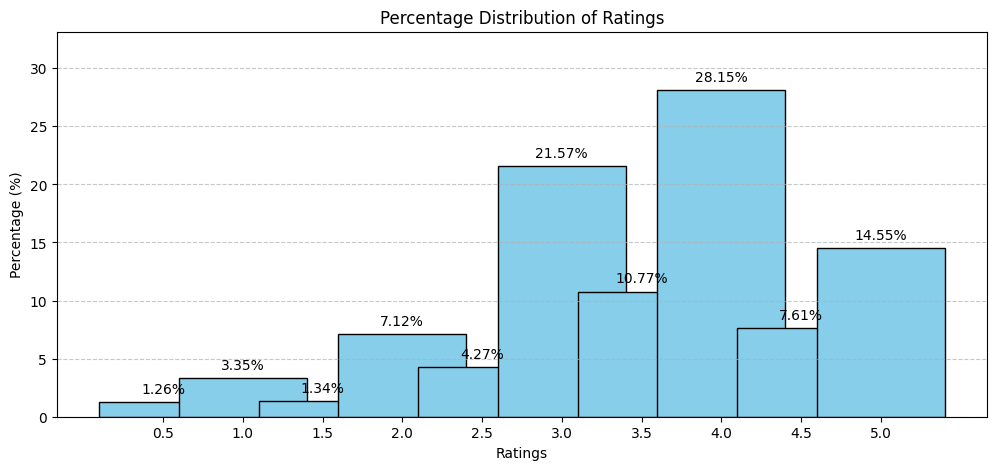

In [13]:
# Calculate percentage distribution of ratings
rating_counts = movie_ratings['rating'].value_counts(normalize=True) * 100

# Sort the ratings by index (rating value)
rating_counts = rating_counts.sort_index()

# Plotting the percentage distribution of ratings
plt.figure(figsize=(12, 5))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.ylim(0, max(rating_counts.values) + 5)
for i, value in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
#Genre Distribution
genre_counts = exploded_genres['genres'].explode().value_counts()
genre_distribution = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
                             labels={'x': 'Genre', 'y': 'Count'}, title='Genre Distribution')
genre_distribution.update_layout(xaxis={'categoryorder': 'total descending'})

# Display genre distribution plot
genre_distribution.show()

**The visualizations above depict that Drama, Comedy, Action, Thriller, and Adventure are the most prevalent genres, in descending order of their ratings.**

In [15]:
# Top Rated Genres
avg_ratings_per_genre = exploded_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)
top_rated_genres = avg_ratings_per_genre.head(10)
top_rated_genres_plot = px.bar(top_rated_genres, x=top_rated_genres.index, y=top_rated_genres.values,
                               labels={'x': 'Genre', 'y': 'Average Rating'}, title='Top Rated Genres')
top_rated_genres_plot.update_layout(xaxis={'categoryorder': 'total descending'})

# Display top rated genres plot
top_rated_genres_plot.show()

**The visualizations above depict that Film-Noir, War, Documentary, Crime, and Drama are ranked as the top-rated genres, in descending order of their average ratings.**

In [16]:
# Least Rated Genres
avg_ratings_per_genre_lowest = exploded_genres.groupby('genres')['rating'].mean().sort_values()
least_rated_genres = avg_ratings_per_genre_lowest.head(10)
least_rated_genres_plot = px.bar(least_rated_genres, x=least_rated_genres.index, y=least_rated_genres.values,
                               labels={'x': 'Genre', 'y': 'Average Rating'}, title='Least Rated Genres')
least_rated_genres_plot.update_layout(xaxis={'categoryorder': 'total ascending'})

# Display top rated genres plot
least_rated_genres_plot.show()

**The visualizations above depict that Horror, Children, Comedy, Sci-fi, and Action are ranked as the least-rated genres, in ascending order of their average ratings.**

In [17]:
# Count number of movies per genre
genre_counts = exploded_genres['genres'].explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create a bar plot for number of movies per genre
fig_genre_counts = px.bar(genre_counts, x='Genre', y='Count',
                          labels={'Genre': 'Genre', 'Count': 'Number of Movies'},
                          title='Number of Movies per Genre')
fig_genre_counts.update_xaxes(categoryorder='total descending')

# Display the bar plot
fig_genre_counts.show()

#**Recommendation Engine: Find the best-suited movie for a user in each genre**

In [18]:
pip install scikit-surprise

In [19]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD

# Load the dataset using Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_ratings[['userId', 'title', 'rating']], reader)

# Split the data into train and test sets
trainset, _ = train_test_split(data, test_size=0.2)

# Build the SVD model
algo = SVD()
algo.fit(trainset)

# Function to get the best-suited movie for a user in a genre using Surprise SVD
def get_best_movie_for_user_in_genre(user_id, genre):
    # Filter movies of a specific genre
    genre_movies = movie_ratings[movie_ratings['genres'].apply(lambda x: genre in x)]

    # Filter ratings of the user for movies in the specified genre
    user_genre_ratings = genre_movies[genre_movies['userId'] == user_id]

    if user_genre_ratings.empty:
        return None

    # Create a list of unique movies in the specified genre
    genre_unique_movies = list(genre_movies['title'].unique())

    # Predict ratings for unrated movies in the specified genre for the user
    predicted_ratings = []
    for movie in genre_unique_movies:
        if movie not in user_genre_ratings['title'].values:
            predicted_rating = algo.predict(user_id, movie).est
            predicted_ratings.append((movie, predicted_rating))

    # Get the movie with the highest predicted rating
    best_movie = max(predicted_ratings, key=lambda x: x[1])[0]
    return best_movie

# Dictionary to store best-suited movies for the user in each genre
best_movies_for_user_in_genres = {}

# Specify the user ID for whom you want to find the best-suited movies
user_id = 1  # Replace the user ID

# List of unique genres in the dataset
unique_genres = movie_ratings['genres'].explode().unique()

# Find the best-suited movie for the user in each genre
for genre in unique_genres:
    best_movie_for_user = get_best_movie_for_user_in_genre(user_id, genre)
    if best_movie_for_user:
        best_movies_for_user_in_genres[genre] = best_movie_for_user

# Display the best-suited movies for the user in each genre
for genre, movie in best_movies_for_user_in_genres.items():
    print(f"Best movie for user {user_id} in '{genre}' genre: {movie}")


Best movie for user 1 in 'Adventure' genre: Serenity (2005)
Best movie for user 1 in 'Animation' genre: Paprika (Papurika) (2006)
Best movie for user 1 in 'Children' genre: Anne of Green Gables (1985)
Best movie for user 1 in 'Comedy' genre: Underground (1995)
Best movie for user 1 in 'Fantasy' genre: Let the Right One In (Låt den rätte komma in) (2008)
Best movie for user 1 in 'Romance' genre: Let the Right One In (Låt den rätte komma in) (2008)
Best movie for user 1 in 'Drama' genre: Black Mirror (2011)
Best movie for user 1 in 'Action' genre: Serenity (2005)
Best movie for user 1 in 'Crime' genre: Elite Squad (Tropa de Elite) (2007)
Best movie for user 1 in 'Thriller' genre: Elite Squad (Tropa de Elite) (2007)
Best movie for user 1 in 'Horror' genre: Let the Right One In (Låt den rätte komma in) (2008)
Best movie for user 1 in 'Mystery' genre: Paprika (Papurika) (2006)
Best movie for user 1 in 'Sci-Fi' genre: Black Mirror (2011)
Best movie for user 1 in 'IMAX' genre: Star Trek (2009